In [4]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


# Clustering

## DBScan

## K-means

In [17]:
dt_clusters

,start_station_latitude,start_station_longitude,cluster
start_station_id,,,
72.0,40.767272,-73.993929,11
79.0,40.719116,-74.006667,5
82.0,40.711174,-74.000165,5
83.0,40.683826,-73.976323,3
119.0,40.696089,-73.978034,3
...,...,...,...
3716.0,40.753599,-73.937956,6
3718.0,40.727464,-73.979504,8
3719.0,40.683223,-73.973812,3


In [20]:
df_merged = f.merge(
    dt_clusters[['cluster']], 
    left_on='start_station_id', 
    right_index=True, 
    how='left'
)
df_merged = df_merged.drop(columns=['Unnamed: 0'])


# Investigating a cluster

In [23]:
cluster_12 = cluster_12.copy()
cluster_12.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
296478,380,2018-01-01 07:13:56.214,2018-01-01 07:20:16.862,467.0,40.683125,-73.978951,3418.0,40.675021,-73.971115,27168,Subscriber,1984,1,0,False,12
296479,1774,2018-01-01 09:07:12.933,2018-01-01 09:36:47.186,467.0,40.683125,-73.978951,481.0,40.712605,-73.962644,32983,Subscriber,1989,2,0,False,12
296480,248,2018-01-01 11:24:01.189,2018-01-01 11:28:10.166,467.0,40.683125,-73.978951,3339.0,40.676530,-73.978469,19322,Subscriber,1987,1,0,False,12
296481,162,2018-01-01 15:03:20.099,2018-01-01 15:06:03.015,467.0,40.683125,-73.978951,3413.0,40.682755,-73.982586,30435,Subscriber,1975,2,0,False,12
296482,121,2018-01-01 15:54:51.499,2018-01-01 15:56:53.332,467.0,40.683125,-73.978951,3419.0,40.679279,-73.981540,21757,Subscriber,1990,1,0,False,12


In [24]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour']).size().reset_index(name='num_trips')
trips_per_hour


,date,hour,num_trips
0,2018-01-01,0,3
1,2018-01-01,1,7
2,2018-01-01,2,1
3,2018-01-01,4,3
4,2018-01-01,5,1
...,...,...,...
8299,2018-12-31,19,4
8300,2018-12-31,20,8
8301,2018-12-31,21,3
8302,2018-12-31,22,1


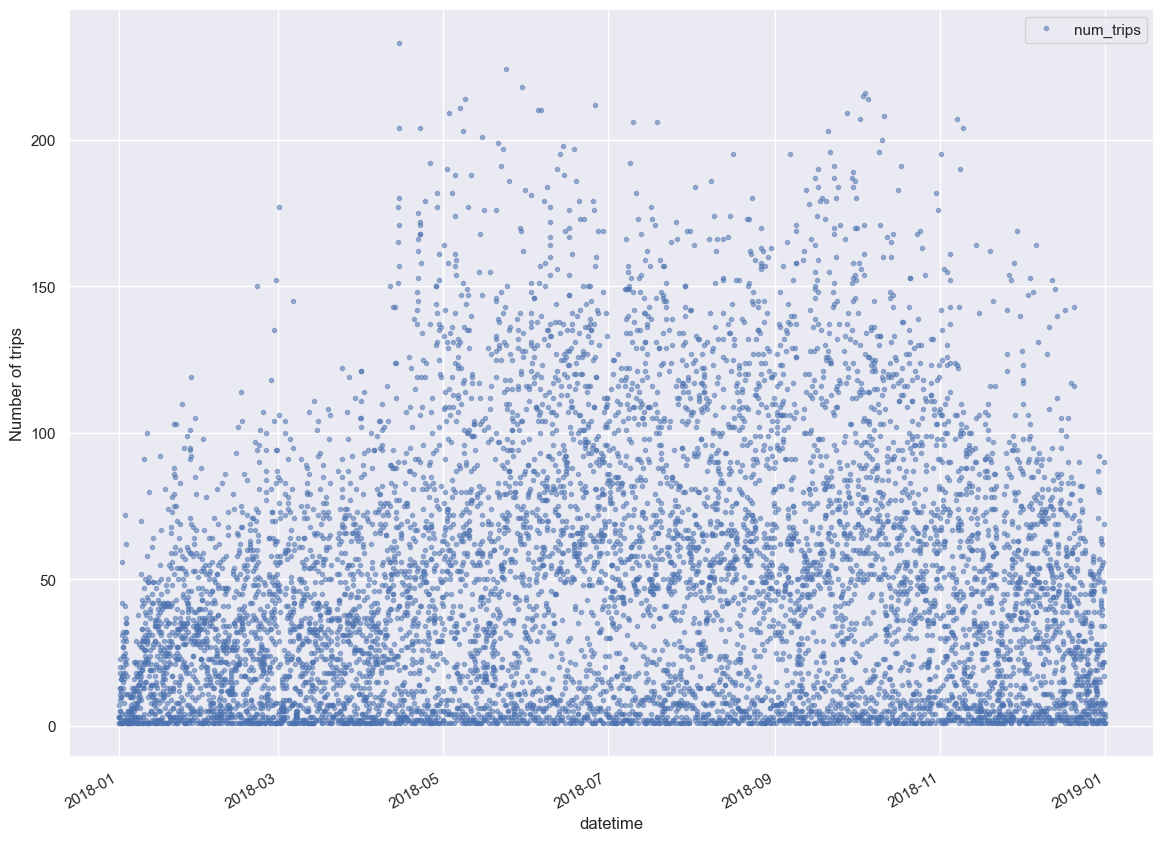

In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

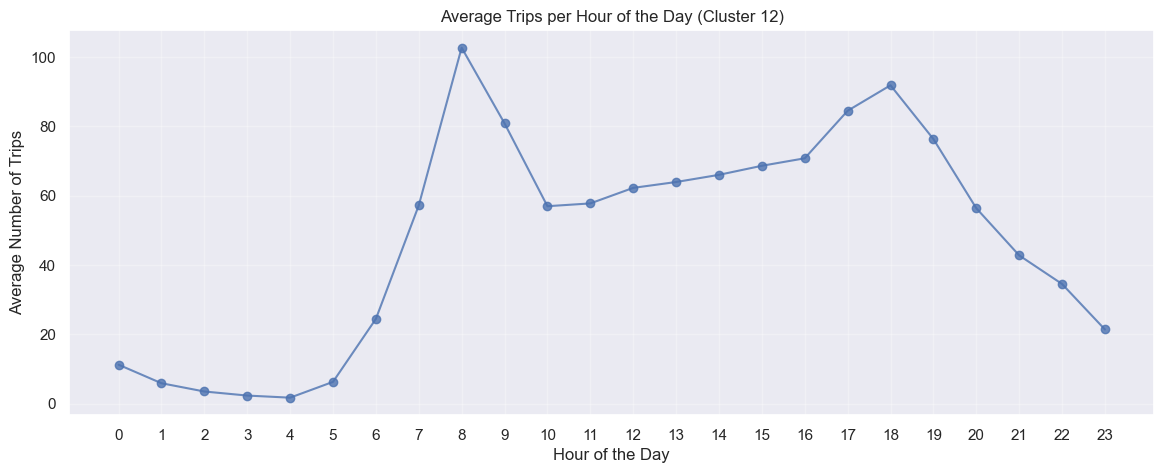

In [28]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour = trips_per_hour.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()


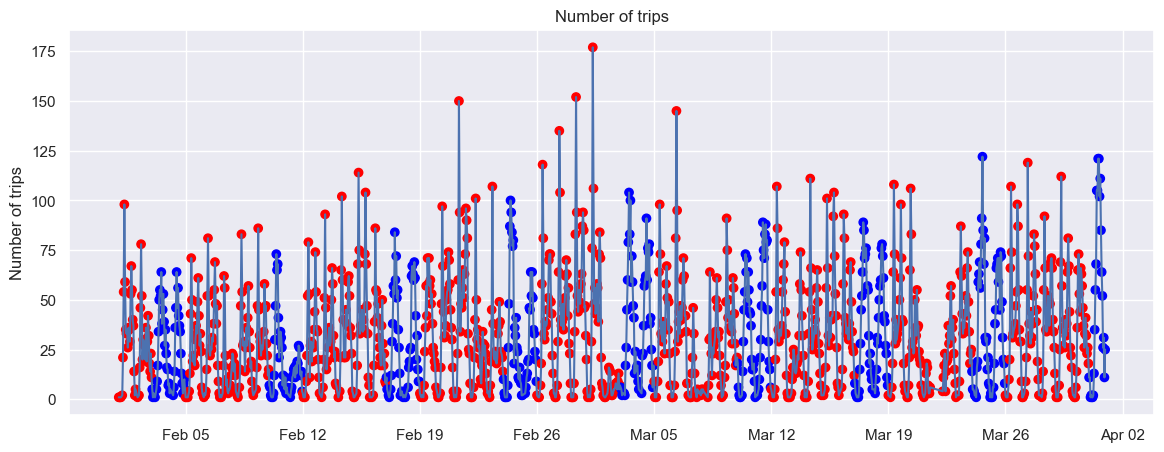

In [30]:
import matplotlib.dates as mdates
weekends=trips_per_hour.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour.loc['2018-02':'2018-03'].index, trips_per_hour.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [31]:


# Make sure starttime is a datetime
df_merged['starttime'] = pd.to_datetime(df_merged['starttime'])

# Extract date and hour
df_merged['date'] = df_merged['starttime'].dt.date
df_merged['hour'] = df_merged['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour_all = df_merged.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour_all['datetime'] = pd.to_datetime(trips_per_hour_all['date'].astype(str)) + pd.to_timedelta(trips_per_hour_all['hour'], unit='h')
trips_per_hour_all.set_index('datetime', inplace=True)
trips_per_hour_all.drop(columns=['date'], inplace=True)

Text(0, 0.5, 'number of trips')

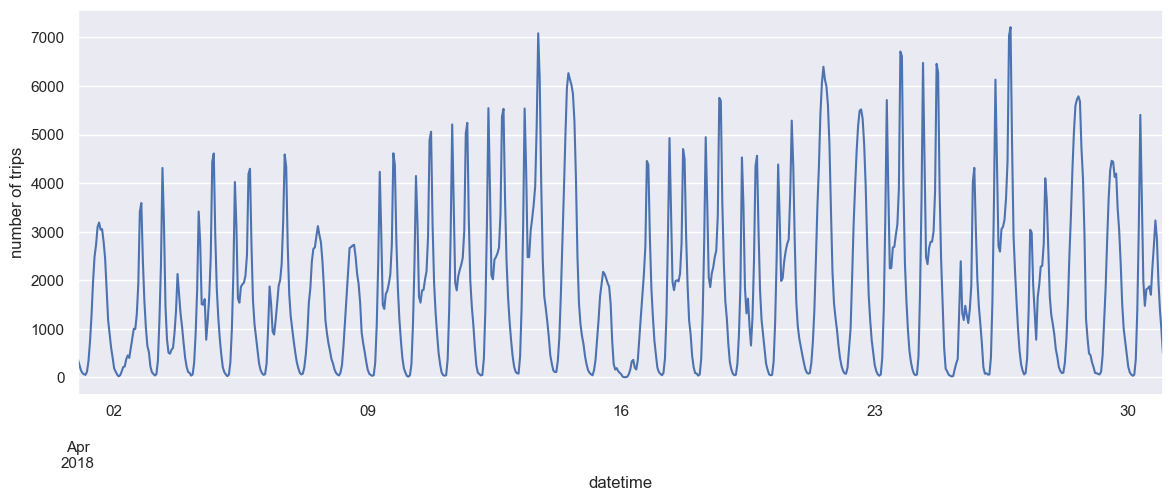

In [33]:
ax = trips_per_hour_all.loc['2018-04', 'num_trips'].plot()
ax.set_ylabel('number of trips')

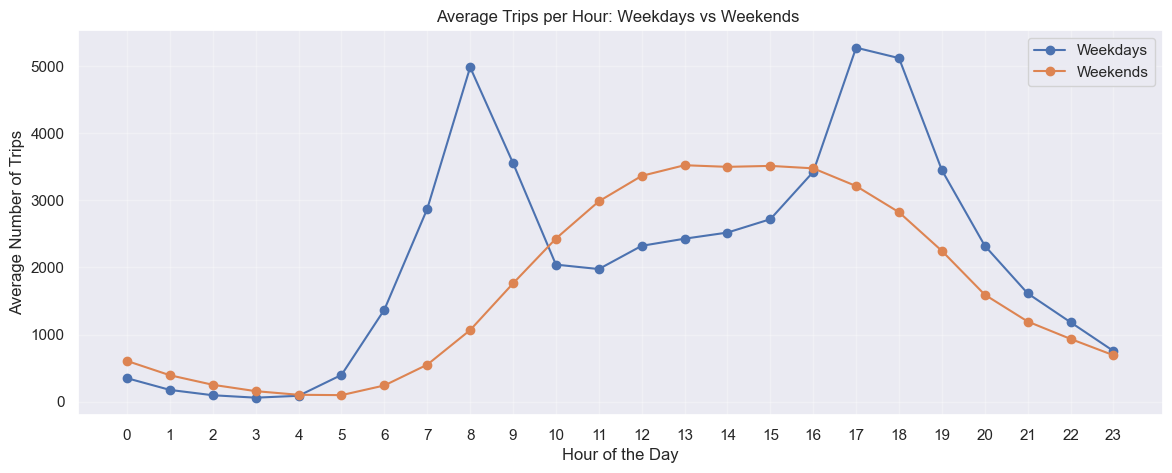

In [35]:

# Extract hour from datetime index if not already present
trips_per_hour_all['hour'] = trips_per_hour_all.index.hour
trips_per_hour_all['is_weekend'] = trips_per_hour_all.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour_all[~trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour_all[trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends ')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

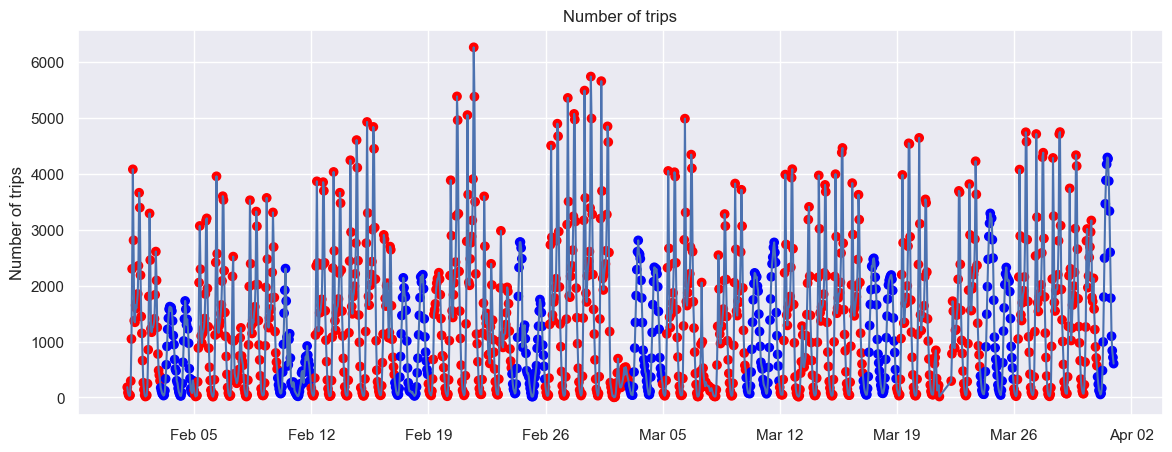

In [36]:
weekends=trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour_all.loc['2018-02':'2018-03'].index, trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [144]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Exploring seasonality in all the data

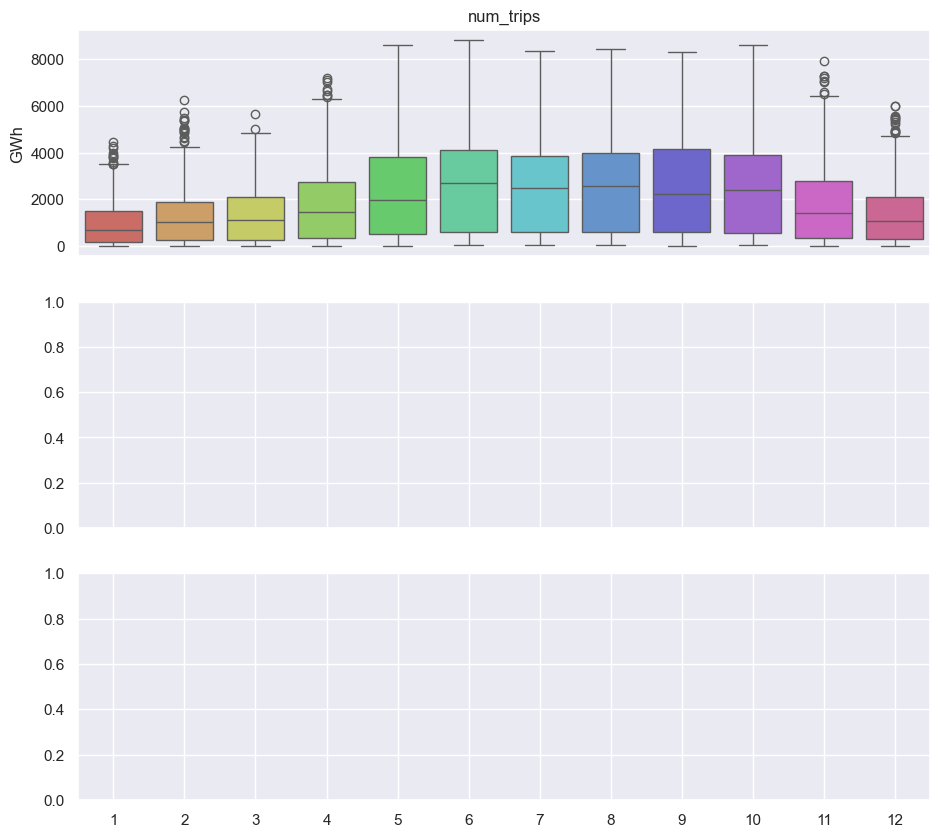

In [146]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
trips_per_hour_all['Month'] = trips_per_hour_all.index.month
for name, ax in zip(['num_trips'], axes):
    sns.boxplot(data=trips_per_hour_all, x='Month', y=name, ax=ax, hue='Month',palette=sns.color_palette("hls", 12),legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

In [147]:
sns.boxplot(data=trips_per_hour_all, x='hour', y='num_trips',hue='hour',palette=sns.color_palette("hls", 24),legend=False)

,start_station_latitude,start_station_longitude,cluster
start_station_id,,,
72.0,40.767272,-73.993929,11
79.0,40.719116,-74.006667,5
82.0,40.711174,-74.000165,5
83.0,40.683826,-73.976323,3
119.0,40.696089,-73.978034,3
...,...,...,...
3716.0,40.753599,-73.937956,6
3718.0,40.727464,-73.979504,8
3719.0,40.683223,-73.973812,3


K=10, silhouette=0.3763
K=15, silhouette=0.4007
K=20, silhouette=0.4061
K=25, silhouette=0.3739
K=20, silhouette=0.4061
K=25, silhouette=0.3739
K=30, silhouette=0.3635
K=35, silhouette=0.3653
K=30, silhouette=0.3635
K=35, silhouette=0.3653
K=40, silhouette=0.3597
K=40, silhouette=0.3597


K=10, silhouette=0.3763
K=15, silhouette=0.4007
K=20, silhouette=0.4061
K=25, silhouette=0.3739
K=20, silhouette=0.4061
K=25, silhouette=0.3739
K=30, silhouette=0.3635
K=35, silhouette=0.3653
K=30, silhouette=0.3635
K=35, silhouette=0.3653
K=40, silhouette=0.3597
K=40, silhouette=0.3597


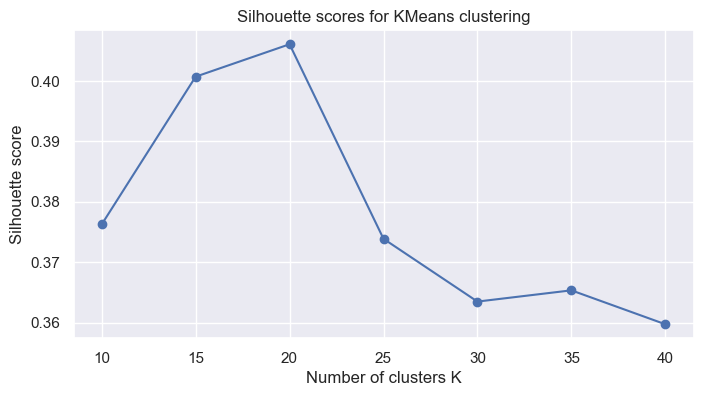

In [148]:
# --- Silhouette analysis for KMeans clustering ---

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the coordinate data for clustering analysis
coords_data = new_df[['start_station_longitude', 'start_station_latitude']]

Ks = range(10, 41, 5)  # try K = 10,15,...,40 (change if you like)
sil_scores = []

for K_tmp in Ks:
    kmeans_tmp = KMeans(n_clusters=K_tmp, random_state=42, n_init=10)
    labels_tmp = kmeans_tmp.fit_predict(coords_data)
    score = silhouette_score(coords_data, labels_tmp)
    sil_scores.append(score)
    print(f"K={K_tmp}, silhouette={score:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(Ks, sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for KMeans clustering")
plt.grid(True)
plt.show()

# Rolling average

In [ ]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [ ]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [ ]:
f.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
dtype: object

# Clustering

In [ ]:
x=new_df[['start_station_longitude', 'start_station_latitude']]
len(x)

819

## DBScan

In [ ]:
dbs.labels_

array([-1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  1,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,
        0,  1,  0, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1

## K-means

In [ ]:
k.fit(new_df)

KMeans(n_clusters=20)

In [ ]:
dt_clusters

,start_station_latitude,start_station_longitude,cluster
start_station_id,,,
72.0,40.767272,-73.993929,5
79.0,40.719116,-74.006667,7
82.0,40.711174,-74.000165,7
83.0,40.683826,-73.976323,15
119.0,40.696089,-73.978034,15
...,...,...,...
3716.0,40.753599,-73.937956,19
3718.0,40.727464,-73.979504,3
3719.0,40.683223,-73.973812,15


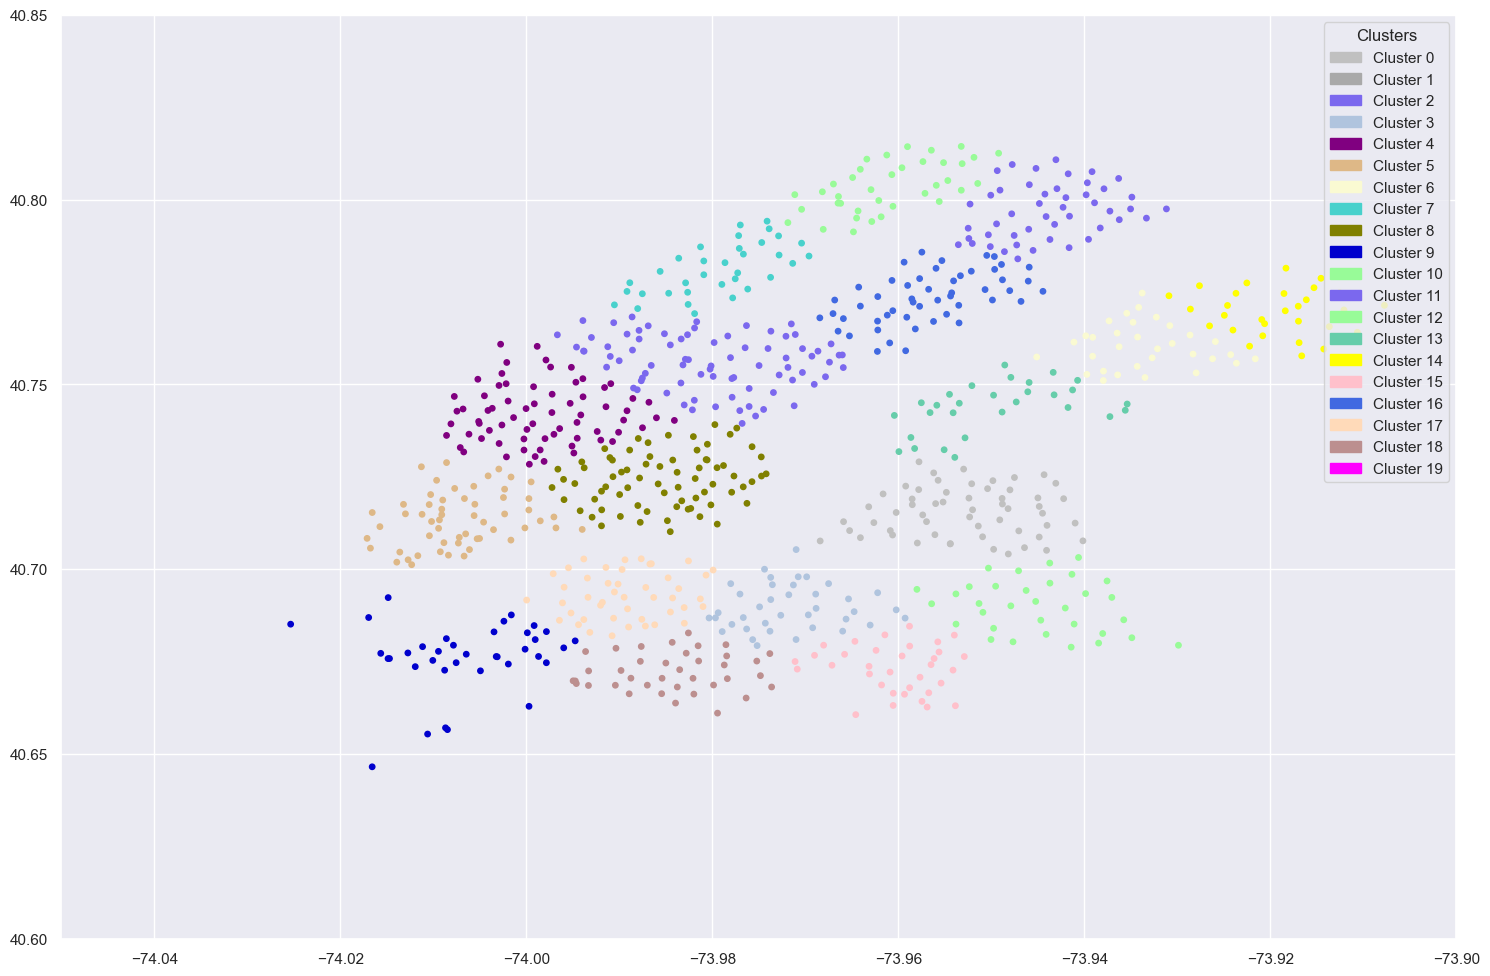

In [151]:
import matplotlib.patches as mpatches
import random

num_colors = K  # number of clusters excluding -1
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.choices(colors, k=num_colors)

x_points = dt_clusters["start_station_longitude"]
y_points = dt_clusters["start_station_latitude"]
labels = dt_clusters["cluster"]

x_ = []
y_ = []
c_ = []

for label, x, y in zip(labels, x_points, y_points):
    if label == -1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])

plt.figure(figsize=(18, 12))
plt.scatter(x_, y_, s=15, c=c_)

# Set axis limits
plt.xlim(-74.05, -73.9)
plt.ylim(40.6, 40.85)

# Create legend patches
legend_patches = [
    mpatches.Patch(color=cluster_colors[i], label=f'Cluster {i}')
    for i in range(num_colors)
]
plt.legend(handles=legend_patches, title="Clusters", loc="upper right")

plt.show()


In [ ]:
df_merged = f.merge(
    dt_clusters[['cluster']], 
    left_on='start_station_id', 
    right_index=True, 
    how='left'
)
df_merged = df_merged.drop(columns=['Unnamed: 0'])


# Investigating a cluster

In [ ]:
cluster_12 = cluster_12.copy()
cluster_12.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
296478,380,2018-01-01 07:13:56.214,2018-01-01 07:20:16.862,467.0,40.683125,-73.978951,3418.0,40.675021,-73.971115,27168,Subscriber,1984,1,0,False,12
296479,1774,2018-01-01 09:07:12.933,2018-01-01 09:36:47.186,467.0,40.683125,-73.978951,481.0,40.712605,-73.962644,32983,Subscriber,1989,2,0,False,12
296480,248,2018-01-01 11:24:01.189,2018-01-01 11:28:10.166,467.0,40.683125,-73.978951,3339.0,40.676530,-73.978469,19322,Subscriber,1987,1,0,False,12
296481,162,2018-01-01 15:03:20.099,2018-01-01 15:06:03.015,467.0,40.683125,-73.978951,3413.0,40.682755,-73.982586,30435,Subscriber,1975,2,0,False,12
296482,121,2018-01-01 15:54:51.499,2018-01-01 15:56:53.332,467.0,40.683125,-73.978951,3419.0,40.679279,-73.981540,21757,Subscriber,1990,1,0,False,12


In [ ]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour']).size().reset_index(name='num_trips')
trips_per_hour


,date,hour,num_trips
0,2018-01-01,0,3
1,2018-01-01,1,7
2,2018-01-01,2,1
3,2018-01-01,4,3
4,2018-01-01,5,1
...,...,...,...
8299,2018-12-31,19,4
8300,2018-12-31,20,8
8301,2018-12-31,21,3
8302,2018-12-31,22,1


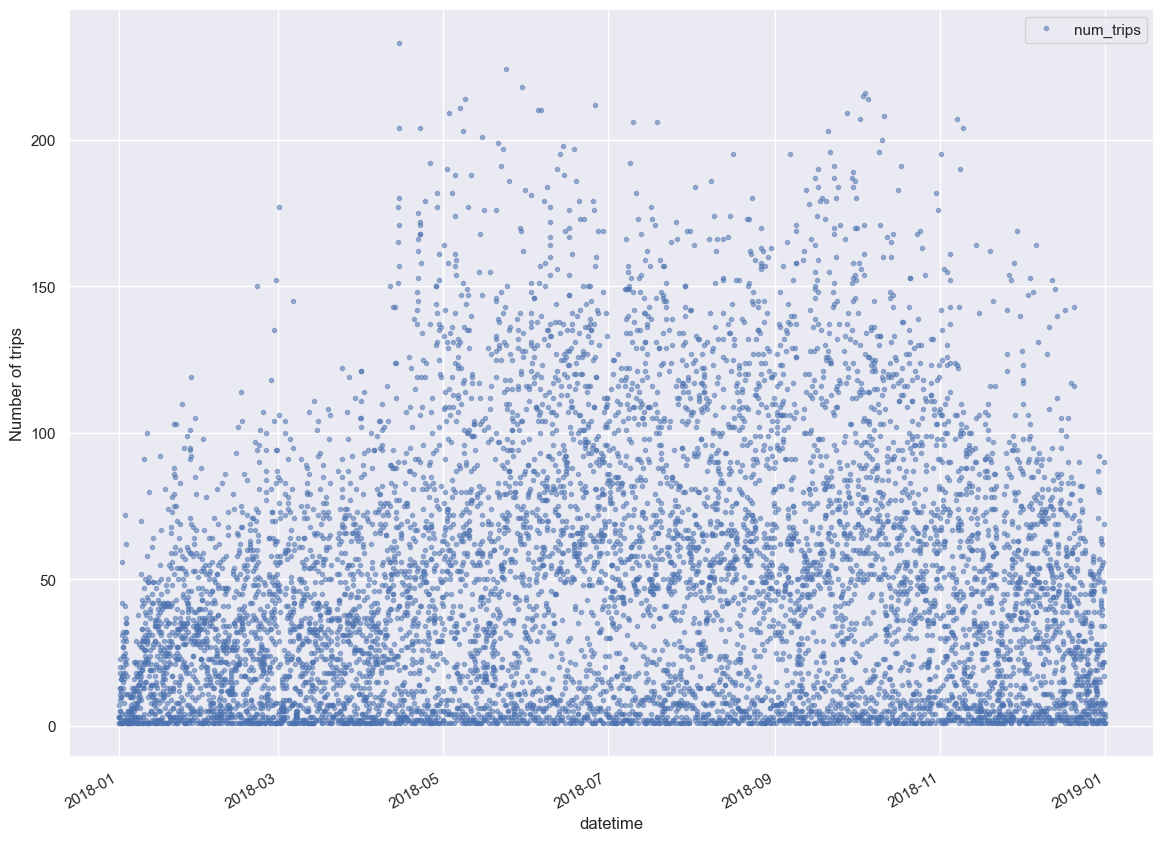

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

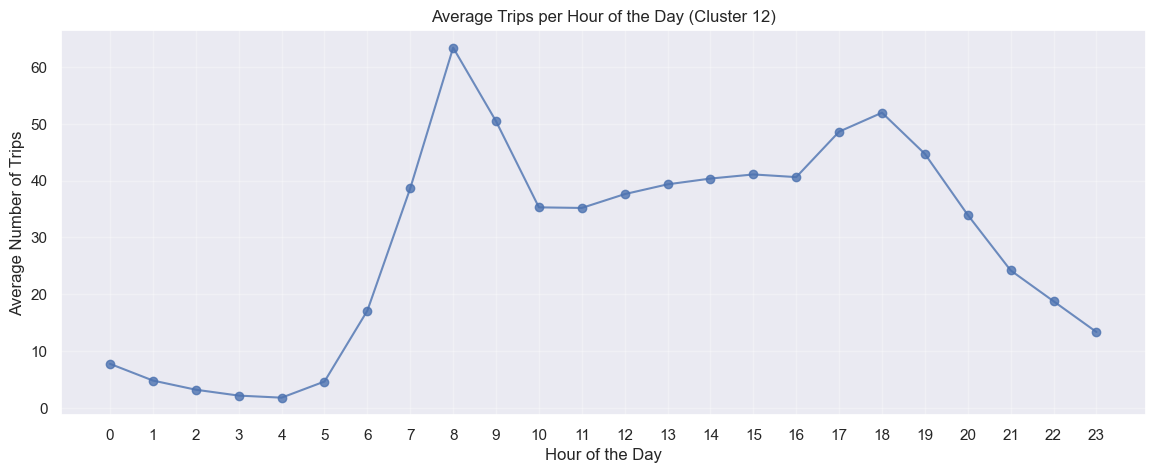

In [ ]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour = trips_per_hour.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()


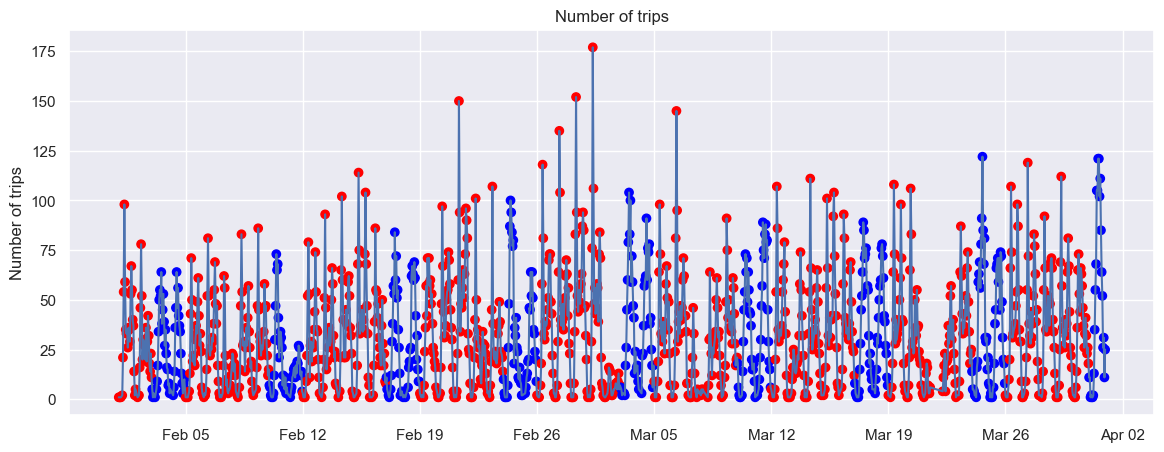

In [ ]:
import matplotlib.dates as mdates
weekends=trips_per_hour.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour.loc['2018-02':'2018-03'].index, trips_per_hour.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [ ]:


# Make sure starttime is a datetime
df_merged['starttime'] = pd.to_datetime(df_merged['starttime'])

# Extract date and hour
df_merged['date'] = df_merged['starttime'].dt.date
df_merged['hour'] = df_merged['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour_all = df_merged.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour_all['datetime'] = pd.to_datetime(trips_per_hour_all['date'].astype(str)) + pd.to_timedelta(trips_per_hour_all['hour'], unit='h')
trips_per_hour_all.set_index('datetime', inplace=True)
trips_per_hour_all.drop(columns=['date'], inplace=True)

Text(0, 0.5, 'number of trips')

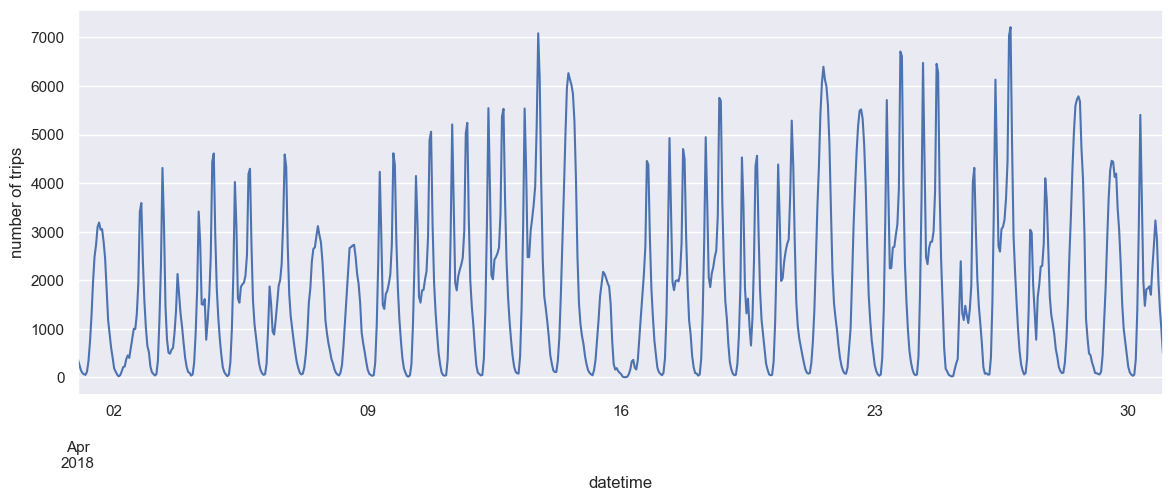

In [ ]:
ax = trips_per_hour_all.loc['2018-04', 'num_trips'].plot()
ax.set_ylabel('number of trips')

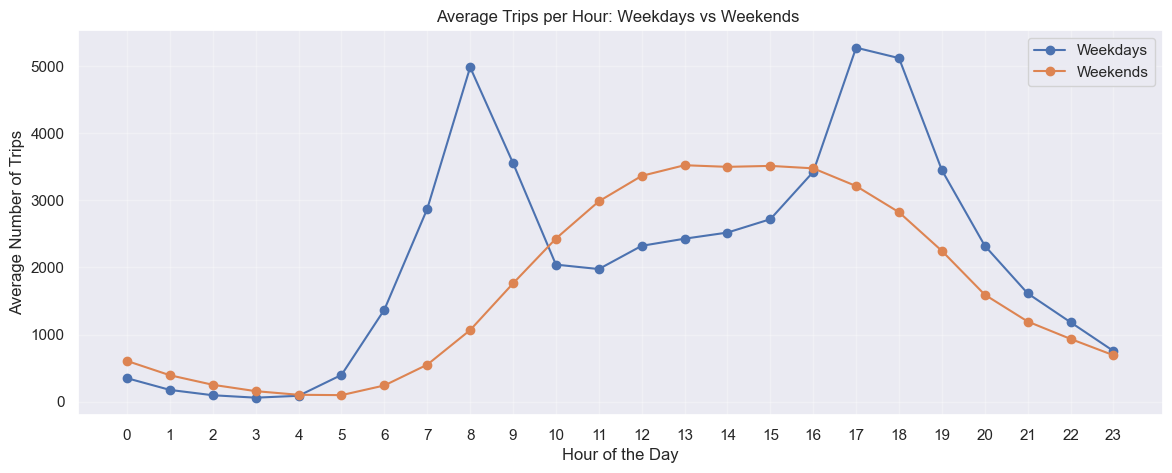

In [ ]:

# Extract hour from datetime index if not already present
trips_per_hour_all['hour'] = trips_per_hour_all.index.hour
trips_per_hour_all['is_weekend'] = trips_per_hour_all.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour_all[~trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour_all[trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends ')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


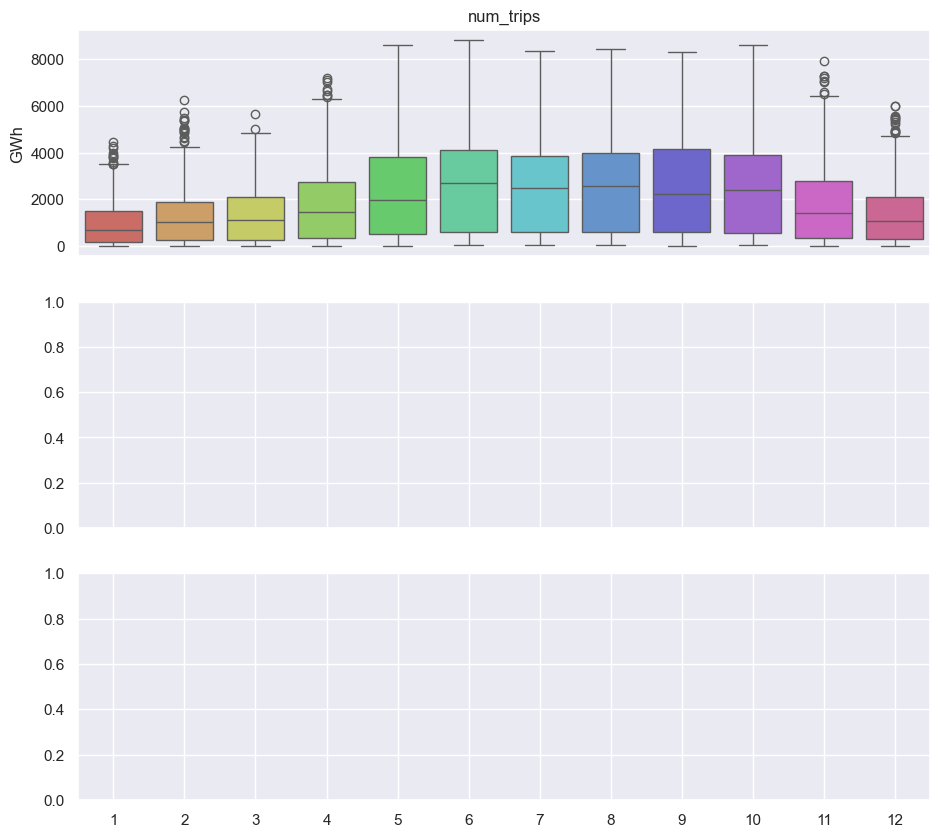

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
trips_per_hour_all['Month'] = trips_per_hour_all.index.month
for name, ax in zip(['num_trips'], axes):
    sns.boxplot(data=trips_per_hour_all, x='Month', y=name, ax=ax, hue='Month',palette=sns.color_palette("hls", 12),legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

# Rolling average

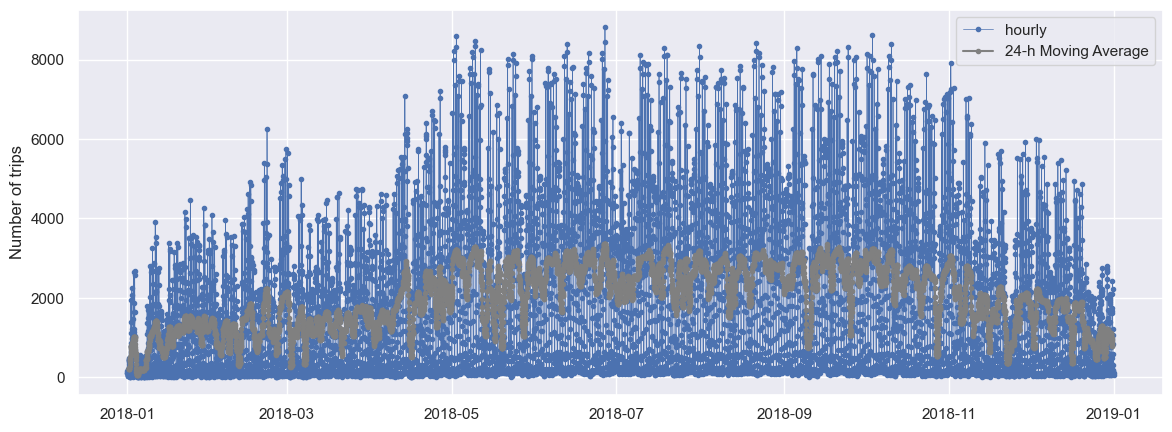

In [ ]:

opsd_24h = trips_per_hour_all[data_columns].rolling(24, center=True).mean()
start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc[start:end, 'num_trips'],
marker='.', linestyle='-', linewidth=0.5, label='hourly')
ax.plot(opsd_24h.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='24-h Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Further investigation of what variables to keep for our prediction model

In [ ]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour'])
trips_per_hour.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
296478,380,2018-01-01 07:13:56.214,2018-01-01 07:20:16.862,467.0,40.683125,-73.978951,3418.0,40.675021,-73.971115,27168,Subscriber,1984,1,0,False,12,2018-01-01,7
296479,1774,2018-01-01 09:07:12.933,2018-01-01 09:36:47.186,467.0,40.683125,-73.978951,481.0,40.712605,-73.962644,32983,Subscriber,1989,2,0,False,12,2018-01-01,9
296480,248,2018-01-01 11:24:01.189,2018-01-01 11:28:10.166,467.0,40.683125,-73.978951,3339.0,40.676530,-73.978469,19322,Subscriber,1987,1,0,False,12,2018-01-01,11
296481,162,2018-01-01 15:03:20.099,2018-01-01 15:06:03.015,467.0,40.683125,-73.978951,3413.0,40.682755,-73.982586,30435,Subscriber,1975,2,0,False,12,2018-01-01,15
296482,121,2018-01-01 15:54:51.499,2018-01-01 15:56:53.332,467.0,40.683125,-73.978951,3419.0,40.679279,-73.981540,21757,Subscriber,1990,1,0,False,12,2018-01-01,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548100,2119,2018-12-31 21:13:05.732,2018-12-31 21:48:25.147,3404.0,40.670492,-73.985417,3368.0,40.672816,-73.983524,27541,Subscriber,1970,1,0,False,12,2018-12-31,21
17548126,158,2018-12-31 21:28:09.056,2018-12-31 21:30:47.355,3423.0,40.661063,-73.979453,3300.0,40.665147,-73.976376,17113,Subscriber,1979,2,0,False,12,2018-12-31,21
17548159,1592,2018-12-31 21:50:45.543,2018-12-31 22:17:18.434,3368.0,40.672816,-73.983524,3232.0,40.689622,-73.983043,35725,Subscriber,1970,1,0,False,12,2018-12-31,21
17548259,3393,2018-12-31 22:50:49.613,2018-12-31 23:47:23.474,3300.0,40.665147,-73.976376,3349.0,40.672968,-73.970880,17113,Subscriber,1985,1,0,False,12,2018-12-31,22


In [ ]:

grouped = (
    cluster_12.groupby(['date', 'hour'])
      .agg(
          trip_count=('tripduration', 'count'),
          is_weekend=('is_weekend', 'first'),
          most_common_user_type=('usertype', lambda x: x.value_counts().index[0]),
          most_common_gender=('gender', lambda x: x.value_counts().index[0]),
          duration_mean=('tripduration', 'mean'),
          birth_mean=('birth_year', 'mean')
      )
      .reset_index()
)


In [ ]:
grouped

,trip_count,is_weekend,most_common_user_type,most_common_gender,duration_mean,birth_mean
datetime,,,,,,
2018-01-01 00:00:00,3,False,Subscriber,1,571.333333,1975.333333
2018-01-01 01:00:00,7,False,Subscriber,1,374.857143,1978.000000
2018-01-01 02:00:00,1,False,Subscriber,1,185.000000,1981.000000
2018-01-01 04:00:00,3,False,Subscriber,1,497.000000,1979.333333
2018-01-01 05:00:00,1,False,Subscriber,1,236.000000,1961.000000
...,...,...,...,...,...,...
2018-12-31 19:00:00,4,False,Subscriber,2,386.750000,1982.500000
2018-12-31 20:00:00,8,False,Subscriber,1,515.250000,1987.500000
2018-12-31 21:00:00,3,False,Subscriber,1,1289.666667,1973.000000


## non stationarity - hjælp
Vi kan jo se nogle klare seasonalities - how to account for them

## Naive model - predict same val for trip_count as 24 h before

In [ ]:
def plain_moving_average(series, n):
    #write your code here
    return list([np.average(series.iloc[max(i-n,0):i-1]) for i in range(1,len(series)+1)])

def plotprediction(series, pred_series, labels=["original", "predicted"], x_axis=None, plot_intervals=False, scale=1.96, plot_anomalies=False, title="prediction"):

    plt.figure(figsize=(15,5))
    plt.title(title)
    if x_axis is None:
        x_axis=series.index
    
    plt.plot(x_axis, pred_series, "g", label=labels[1])
    plt.plot(x_axis, series, label=labels[0])
    

    # Plot confidence intervals for smoothed values

    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

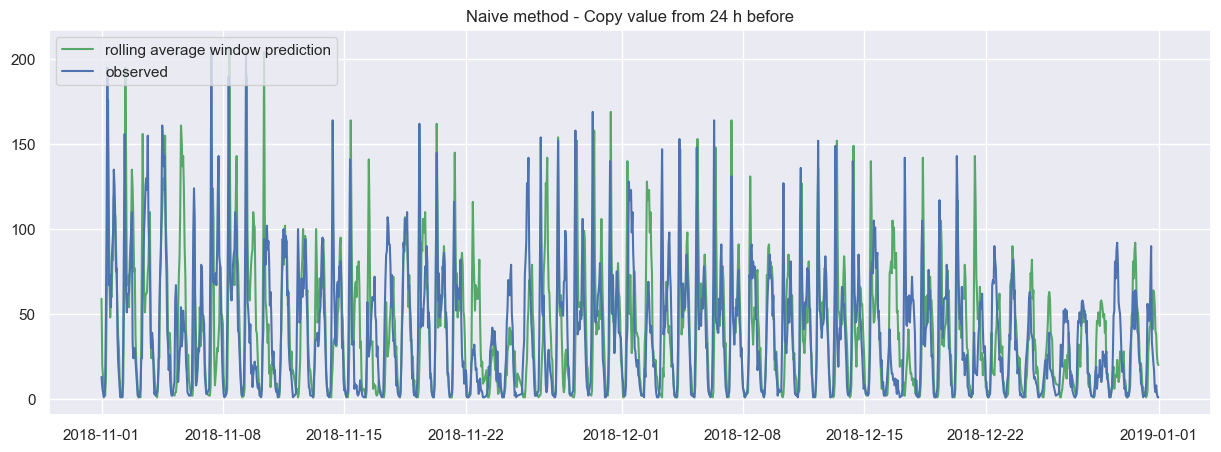

In [ ]:
plotprediction(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], labels=['observed', 'rolling average window prediction'], title="Naive method - Copy value from 24 h before")

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_stats(y_test, y_preds, title="You forgot the title!"):
    print(title+": ")
    print("\tr^2=%f"%r2_score(y_test,y_preds))
    print("\tMAE=%f"%mean_absolute_error(y_test,y_preds))
    print("\tMAPE=%f"%mean_absolute_percentage_error(y_test,y_preds))

# Trying to do an ARIMA model
### Be aware that for this ARIMA model we only use trip_count as variable to predict - not weekend or any of the others

So QUESTIONS:
Can we get categorical (or event just more data) in the arima model?
How to choose parameters for p,q and d? 

Det kan være at ARIMA med tuning kan blive godt, men Lineær Regression kan muligvis opnå lignende resultater med mindre besvær. -(Konklusion fra kaggle-linket)

In [ ]:
grouped_data = pd.DataFrame(grouped.trip_count.copy())
grouped_data


,trip_count
datetime,
2018-01-01 00:00:00,3
2018-01-01 01:00:00,7
2018-01-01 02:00:00,1
2018-01-01 04:00:00,3
2018-01-01 05:00:00,1
...,...
2018-12-31 19:00:00,4
2018-12-31 20:00:00,8
2018-12-31 21:00:00,3


In [ ]:
len(data)

6920

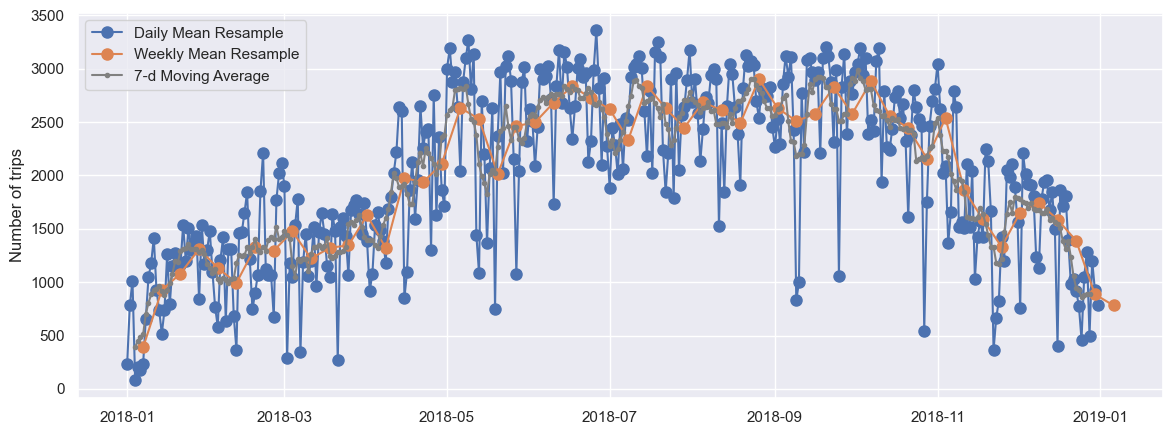

In [40]:
data_columns = ['num_trips']
opsd_daily_mean = trips_per_hour_all[data_columns].resample('D').mean()
opsd_daily_mean[:3]
opsd_weekly_mean = trips_per_hour_all[data_columns].resample('W').mean()
opsd_weekly_mean[:3]

opsd_7d = opsd_daily_mean[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(opsd_weekly_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='7-d Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

# Autocorrelation

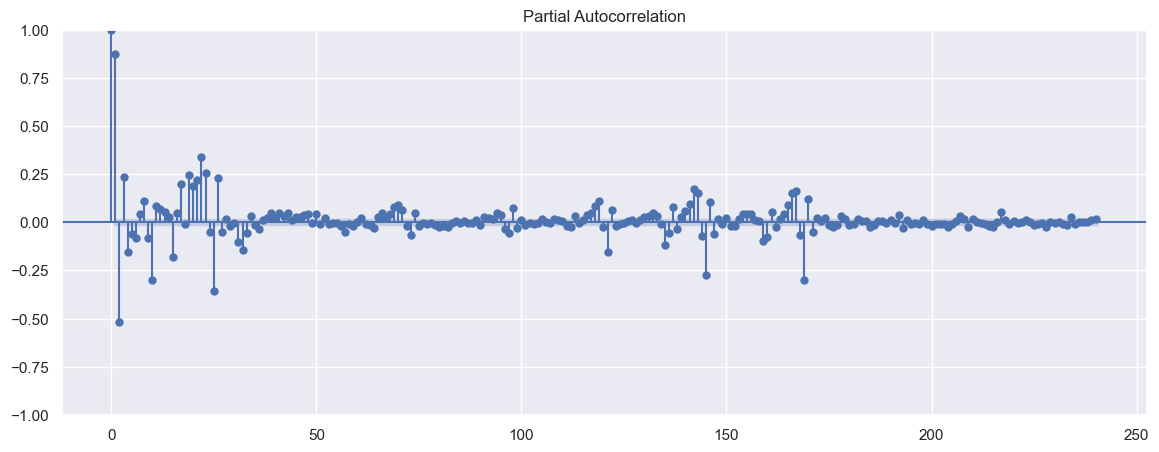

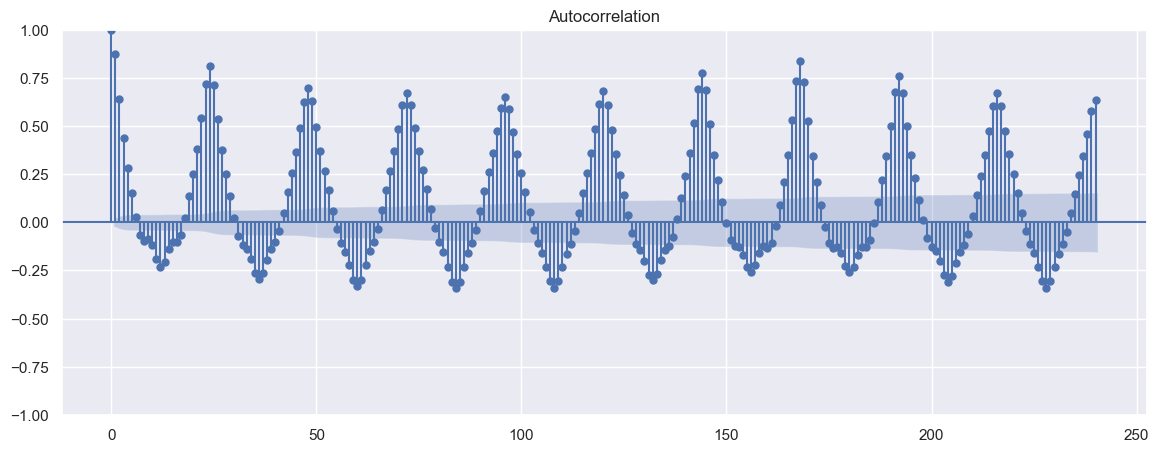

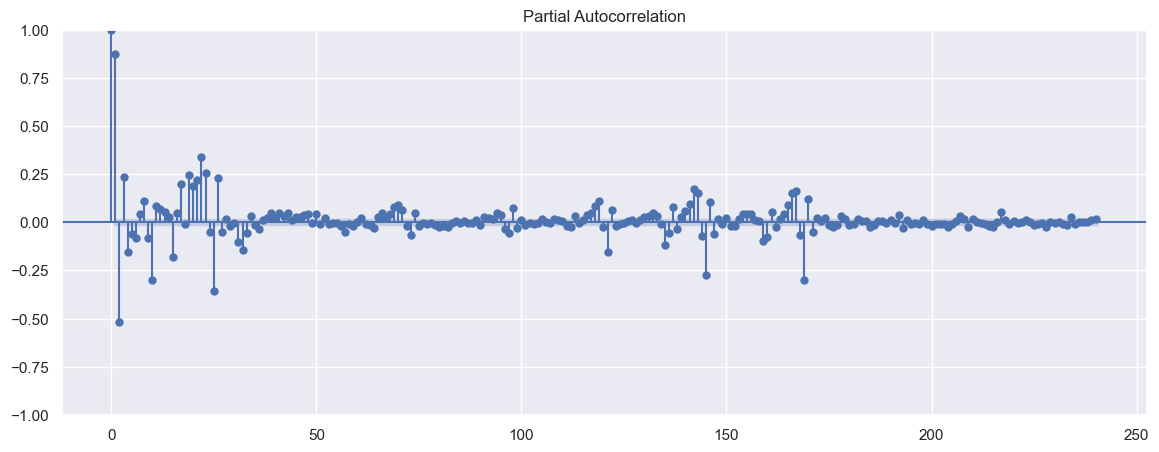

In [43]:
plot_acf(trips_per_hour_all['num_trips'],lags=10*24) # lags valgt udfra 10 dage gnage 24 timer
plot_pacf(trips_per_hour_all['num_trips'],lags=10*24)

We discussed: leaving out starttime, stoptime, and longitude and latitude for both end station and startstation. The spatial because we now just care which cluster we are in, therefore also leave out the stations ID. Starttime is relevant stop time not su much because we try to predict demand. ANd the trip duration will be kept, also weekend, birth year, most common usertype, and most common gender. Bike ID have also been left out as it seems irrelevant to know which bike goes where at this point. 

In [45]:

cluster_12.index.name = 'trip_id'
cluster_12

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
trip_id,,,,,,,,,,,,,,,,,,
296478,380,2018-01-01 07:13:56.214,2018-01-01 07:20:16.862,467.0,40.683125,-73.978951,3418.0,40.675021,-73.971115,27168,Subscriber,1984,1,0,False,12,2018-01-01,7
296479,1774,2018-01-01 09:07:12.933,2018-01-01 09:36:47.186,467.0,40.683125,-73.978951,481.0,40.712605,-73.962644,32983,Subscriber,1989,2,0,False,12,2018-01-01,9
296480,248,2018-01-01 11:24:01.189,2018-01-01 11:28:10.166,467.0,40.683125,-73.978951,3339.0,40.676530,-73.978469,19322,Subscriber,1987,1,0,False,12,2018-01-01,11
296481,162,2018-01-01 15:03:20.099,2018-01-01 15:06:03.015,467.0,40.683125,-73.978951,3413.0,40.682755,-73.982586,30435,Subscriber,1975,2,0,False,12,2018-01-01,15
296482,121,2018-01-01 15:54:51.499,2018-01-01 15:56:53.332,467.0,40.683125,-73.978951,3419.0,40.679279,-73.981540,21757,Subscriber,1990,1,0,False,12,2018-01-01,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548100,2119,2018-12-31 21:13:05.732,2018-12-31 21:48:25.147,3404.0,40.670492,-73.985417,3368.0,40.672816,-73.983524,27541,Subscriber,1970,1,0,False,12,2018-12-31,21
17548126,158,2018-12-31 21:28:09.056,2018-12-31 21:30:47.355,3423.0,40.661063,-73.979453,3300.0,40.665147,-73.976376,17113,Subscriber,1979,2,0,False,12,2018-12-31,21
17548159,1592,2018-12-31 21:50:45.543,2018-12-31 22:17:18.434,3368.0,40.672816,-73.983524,3232.0,40.689622,-73.983043,35725,Subscriber,1970,1,0,False,12,2018-12-31,21


In [47]:
grouped['datetime'] = pd.to_datetime(grouped['date'].astype(str)) + pd.to_timedelta(grouped['hour'], unit='h')
grouped.set_index('datetime', inplace=True)
grouped.drop(columns=['date'], inplace=True)
grouped.drop(columns=['hour'], inplace=True)



# Starting to build model

In [49]:
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [50]:
# Make sure the index is a DatetimeIndex
grouped.index = pd.to_datetime(grouped.index)

# Define the test start date
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start


In [52]:
grouped['copy_pred'] = [0]*24 + grouped['trip_count'].to_list()[:-24]

### Eval. of Naive model

In [55]:
print_stats(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], "copy method")

copy method: 
	r^2=0.045098
	MAE=23.333815
	MAPE=119.917543


In [56]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
data=grouped_data[train_mask]
model=ARIMA(data, order=(24, 0, 0))
AR=model.fit()
print(AR.summary())

c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             trip_count   No. Observations:                 6920
Model:                ARIMA(24, 0, 0)   Log Likelihood              -30556.194
Date:                Thu, 20 Nov 2025   AIC                          61164.389
Time:                        15:31:42   BIC                          61342.285
Sample:                             0   HQIC                         61225.725
                               - 6920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0406      3.946     13.189      0.000      44.307      59.774
ar.L1          0.9583      0.009    109.648      0.000       0.941       0.975
ar.L2         -0.2794      0.015    -19.170      0.0

In [152]:
grouped = (
    cluster_12.groupby(['date', 'hour'])
      .agg(
          trip_count=('tripduration', 'count'),
          is_weekend=('is_weekend', 'first'),
          most_common_user_type=('usertype', lambda x: x.value_counts().index[0]),
          most_common_gender=('gender', lambda x: x.value_counts().index[0]),
          duration_mean=('tripduration', 'mean'),
          birth_mean=('birth_year', 'mean')
      )
      .reset_index()
)

grouped['datetime'] = pd.to_datetime(grouped['date'].astype(str)) + pd.to_timedelta(grouped['hour'], unit='h')
grouped.set_index('datetime', inplace=True)
grouped.drop(columns=['date'], inplace=True)
grouped.drop(columns=['hour'], inplace=True)


In [153]:
# Make sure the index is a DatetimeIndex
grouped.index = pd.to_datetime(grouped.index)

# Define the test start date
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start


In [157]:
# --- Create 24 lag features for trip_count ---

for lag in range(1, 25):
    grouped[f'lag_{lag}'] = grouped['trip_count'].shift(lag)

# Simple calendar/time features
grouped['hour'] = grouped.index.hour
grouped['dow'] = grouped.index.weekday    # day of week (0=Mon,...,6=Sun)
grouped['month'] = grouped.index.month

# One-hot encode categorical variables
grouped_rf = pd.get_dummies(
    grouped,
    columns=['most_common_user_type', 'most_common_gender'],
    drop_first=True
)

# Drop first 24 rows where lags are NaN
grouped_rf = grouped_rf.dropna()

# New train / test masks after dropping NaNs
test_start = pd.Timestamp("2018-11-01")
train_mask_rf = grouped_rf.index < test_start
test_mask_rf  = grouped_rf.index >= test_start

# Define features and target
feature_cols = [c for c in grouped_rf.columns if c != 'trip_count']
X_train = grouped_rf.loc[train_mask_rf, feature_cols]
y_train = grouped_rf.loc[train_mask_rf, 'trip_count']

X_test  = grouped_rf.loc[test_mask_rf, feature_cols]
y_test  = grouped_rf.loc[test_mask_rf, 'trip_count']


In [166]:
# Define evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_stats(y_test, y_preds, title="You forgot the title!"):
    print(title+": ")
    print("\tr^2=%f"%r2_score(y_test,y_preds))
    print("\tMAE=%f"%mean_absolute_error(y_test,y_preds))
    print("\tMAPE=%f"%mean_absolute_percentage_error(y_test,y_preds))

In [159]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print_stats(y_test, y_pred, "Random Forest with 24 lags (Cluster 12)")


Random Forest with 24 lags (Cluster 12): 
	r^2=0.852337
	MAE=5.813669
	MAPE=45.789971


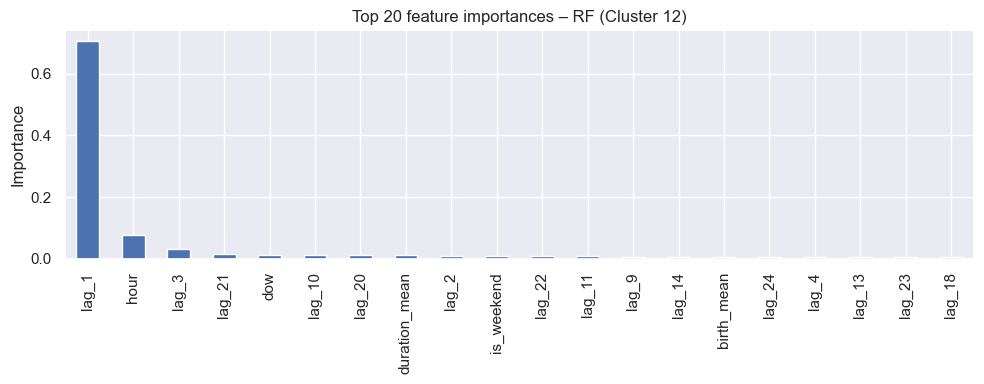

In [162]:
importances = pd.Series(rf.feature_importances_, index=feature_cols)
imp_top = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 4))
imp_top.plot(kind='bar')
plt.title("Top 20 feature importances – RF (Cluster 12)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


The most important predictor by far is **`lag_1`**, the number of trips **one hour ago**.  
It contributes **over 60%** of the total importance.

K=10, silhouette=0.3763
K=15, silhouette=0.4007
K=20, silhouette=0.4061
K=25, silhouette=0.3739
K=30, silhouette=0.3635
K=25, silhouette=0.3739
K=30, silhouette=0.3635
K=35, silhouette=0.3653
K=40, silhouette=0.3597
K=35, silhouette=0.3653
K=40, silhouette=0.3597


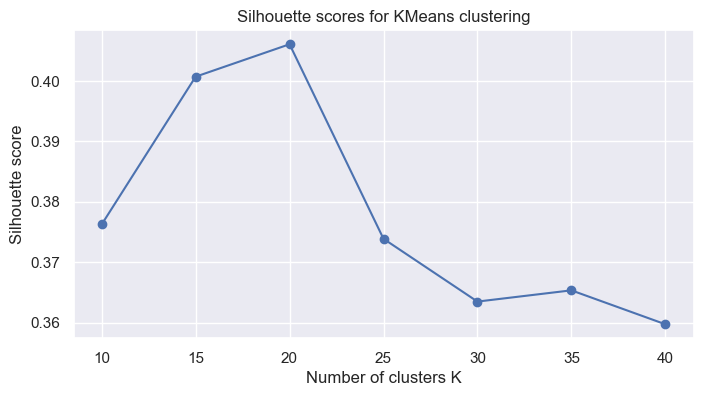

In [167]:
# --- Silhouette analysis for KMeans clustering ---

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the coordinate data for clustering analysis
coords_data = new_df[['start_station_longitude', 'start_station_latitude']]

Ks = range(10, 41, 5)  # try K = 10,15,...,40 (change if you like)
sil_scores = []

for K_tmp in Ks:
    kmeans_tmp = KMeans(n_clusters=K_tmp, random_state=42, n_init=10)
    labels_tmp = kmeans_tmp.fit_predict(coords_data)
    score = silhouette_score(coords_data, labels_tmp)
    sil_scores.append(score)
    print(f"K={K_tmp}, silhouette={score:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(Ks, sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for KMeans clustering")
plt.grid(True)
plt.show()